https://zvi975.tistory.com/65  
텐서플로 설치, 가상환경

# 요약

data는 다 있다.

예측해야하는것 : tag 10개, 곡 100개  
고려해야 할 점: 플레이리스트 update date와 곡 발매일자

val 데이터에 대한 답안 제출! - 리더보드용  
(최종은 test에 대한 답 제출)  

---

In [1]:
import tensorflow as tf

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
# import libraries
import json
import re # regular expression
import gc # to collect memory
from datetime import datetime

import pandas as pd
import numpy as np

# for NLP
# from konlpy.tag import Kkma
# from konlpy.utils import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_name = matplotlib.font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

---

# 1. 데이터 살펴보기

In [3]:
import os

os.getcwd()

'C:\\Users\\user\\Kakao Arena\\data'

In [6]:
# load json files
with open("C:/Users/user/Kakao Arena/data/genre_gn_all.json", encoding = 'utf-8') as json_file: genre = json.load(json_file)
with open("C:/Users/user/Kakao Arena/data/song_meta.json", encoding = 'utf-8') as json_file: song_meta = json.load(json_file)
with open("C:/Users/user/Kakao Arena/data/train.json", encoding = 'utf-8') as json_file: train = json.load(json_file)
with open("C:/Users/user/Kakao Arena/data/val.json", encoding = 'utf-8') as json_file: valid = json.load(json_file)
    
# json to dataframe
df_genre = pd.Series(genre).to_frame('genre').reset_index().rename({'index' : 'gen_id'}, axis = 1)
df_song_meta = pd.DataFrame(song_meta)
df_train = pd.DataFrame(train)
df_valid = pd.DataFrame(valid)

In [12]:
df_train.to_csv('train.csv')
df_valid.to_csv('valid.csv')

In [11]:
df_genre.to_csv('genre.csv')
df_song_meta.to_csv('song_meta.csv')

## 1) 장르 data
### 1. 전체

In [7]:
df_genre

gen_id   genre
0    GN0100     발라드
1    GN0101  세부장르전체
2    GN0102     '80
3    GN0103     '90
4    GN0104     '00
..      ...     ...
249  GN2900     뮤지컬
250  GN2901  세부장르전체
251  GN2902   국내뮤지컬
252  GN2903   국외뮤지컬
253  GN3000   크리스마스

[254 rows x 2 columns]

국내와 해외로 구분 가능하다.  
숫자 값이 더 큰 장르가 해외 음악 장르이다.

### 2. 세부장르

In [20]:
# 장르코드 뒷자리 두 자리가 00이 아닌 코드를 필터링
#dtl: detailed
dtl_genre = df_genre[df_genre['gen_id'].str[-2:] != '00']
dtl_genre.rename(columns = {'gen_id' : 'dtl_gen_id', 'genre' : 'dtl_genre'}, inplace = True)

In [18]:
dtl_genre

dtl_gen_id dtl_genre
1       GN0101    세부장르전체
2       GN0102       '80
3       GN0103       '90
4       GN0104       '00
5       GN0105      '10-
..         ...       ...
247     GN2805      숙면유도
248     GN2806      반려동물
250     GN2901    세부장르전체
251     GN2902     국내뮤지컬
252     GN2903     국외뮤지컬

[224 rows x 2 columns]

### 3. 대분류 장르

In [24]:
# 장르코드 뒷자리 두 자리가 00인 코드를 필터링
main_genre = df_genre[df_genre['gen_id'].str[-2:] == '00']

In [25]:
main_genre

gen_id       genre
0    GN0100         발라드
6    GN0200          댄스
12   GN0300        랩/힙합
18   GN0400    R&B/Soul
22   GN0500        인디음악
32   GN0600        록/메탈
39   GN0700        성인가요
50   GN0800      포크/블루스
56   GN0900         POP
65   GN1000        록/메탈
80   GN1100      일렉트로니카
90   GN1200        랩/힙합
100  GN1300    R&B/Soul
109  GN1400  포크/블루스/컨트리
117  GN1500         OST
128  GN1600         클래식
144  GN1700          재즈
155  GN1800        뉴에이지
163  GN1900       J-POP
176  GN2000        월드뮤직
187  GN2100         CCM
198  GN2200      어린이/태교
215  GN2300        종교음악
218  GN2400          국악
225  GN2500         아이돌
232  GN2600      일렉트로니카
237  GN2700         EDM
242  GN2800       뮤직테라피
249  GN2900         뮤지컬
253  GN3000       크리스마스

### 4. 장르 코드 트리

In [65]:
# 앞자리 네 자리 공통코드 추출
main_genre = main_genre.assign(join_code = main_genre['gen_id'].str[0:4])
dtl_genre  = dtl_genre.assign(join_code = dtl_genre ['dtl_gen_id'].str[0:4])

# Merge
gnr_code_tree = pd.merge(main_genre, dtl_genre , how = 'left', on = 'join_code')

gnr_code_tree[['gen_id', 'genre', 'dtl_gen_id', 'dtl_genre']]

gen_id  genre dtl_gen_id dtl_genre
0    GN0100    발라드     GN0101    세부장르전체
1    GN0100    발라드     GN0102       '80
2    GN0100    발라드     GN0103       '90
3    GN0100    발라드     GN0104       '00
4    GN0100    발라드     GN0105      '10-
..      ...    ...        ...       ...
220  GN2800  뮤직테라피     GN2806      반려동물
221  GN2900    뮤지컬     GN2901    세부장르전체
222  GN2900    뮤지컬     GN2902     국내뮤지컬
223  GN2900    뮤지컬     GN2903     국외뮤지컬
224  GN3000  크리스마스        NaN       NaN

[225 rows x 4 columns]

## 참고
search하는 코드!

In [67]:
# POP 장르(GN0900)의 상세 장르 살펴보기
gnr_code_tree[gnr_code_tree['gen_id'] == 'GN0900']

gen_id genre join_code dtl_gen_id dtl_genre
48  GN0900   POP      GN09     GN0901    세부장르전체
49  GN0900   POP      GN09     GN0902    얼터너티브팝
50  GN0900   POP      GN09     GN0903       올디스
51  GN0900   POP      GN09     GN0904       월드팝
52  GN0900   POP      GN09     GN0905   '60-'70
53  GN0900   POP      GN09     GN0906   '80-'90
54  GN0900   POP      GN09     GN0907       '00
55  GN0900   POP      GN09     GN0908      '10-

---

## 2) 곡 별 메타 데이터 Song meta

In [12]:
df_song_meta

song_gn_dtl_gnr_basket issue_date  \
0                    [GN0901]   20140512   
1            [GN1601, GN1606]   20080421   
2                    [GN0901]   20180518   
3            [GN1102, GN1101]   20151016   
4            [GN1802, GN1801]   20110824   
...                       ...        ...   
707984               [GN2001]   19991219   
707985               [GN0901]   19860000   
707986       [GN0105, GN0101]   20160120   
707987       [GN1807, GN1801]   20131217   
707988       [GN0601, GN0604]   19980000   

                                               album_name  album_id  \
0                            불후의 명곡 - 7080 추억의 얄개시대 팝송베스트   2255639   
1                           Bach : Partitas Nos. 2, 3 & 4    376431   
2                                                     Hit   4698747   
3       Feeling Right (Everything Is Nice) (Feat. Popc...   2644882   
4                                                 그남자 그여자   2008470   
...                                                   ...       ...   
707984               The Best Best Of The Black President     65254   
707985                                        True Colors     44141   
707986                  행보 2015 윤종신 / 작사가 윤종신 Live Part.1   2662866   
707987                                 명상의 시간을 위한 뉴에이지 음악   2221722   
707988                                           김경호 Live     34663   

       artist_id_basket                                          song_name  \
0                [2727]                                           Feelings   
1               [29966]  Bach : Partita No. 4 In D Major, BWV 828 - II....   
2                [3361]                    Solsbury Hill (Remastered 2002)   
3              [838543]  Feeling Right (Everything Is Nice) (Feat. Popc...   
4              [560160]                                            그남자 그여자   
...                 ...                                                ...   
707984         [166499]                           Coffin For Head Of State   
707985          [11837]                                    Change Of Heart   
707986            [437]                                             스치듯 안녕   
707987         [729868]                                               숲의 빛   
707988            [895]                                       Queen 명곡 멜로디   

       song_gn_gnr_basket artist_name_basket      id  
0                [GN0900]  [Various Artists]       0  
1                [GN1600]   [Murray Perahia]       1  
2                [GN0900]    [Peter Gabriel]       2  
3                [GN1100]           [Matoma]       3  
4                [GN1800]         [Jude Law]       4  
...                   ...                ...     ...  
707984           [GN2000]        [Fela Kuti]  707984  
707985           [GN0900]     [Cyndi Lauper]  707985  
707986           [GN0100]              [윤종신]  707986  
707987           [GN1800]     [Nature Piano]  707987  
707988           [GN0600]              [김경호]  707988  

[707989 rows x 9 columns]

#### song_meta의 데이터: 총 707989개
```
id: 곡 ID
album_id: 앨범 ID
artist_id_basket: 아티스트 ID 리스트
artist_name_basket: 아티스트 리스트
song_name: 곡 제목
song_gn_gnr_basket: 곡 장르 리스트
song_gn_dtl_gnr_basket: 곡 세부 장르 리스트
issue_date: 발매일
```

In [26]:
df_song_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707989 entries, 0 to 707988
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   song_gn_dtl_gnr_basket  707989 non-null  object
 1   issue_date              707989 non-null  object
 2   album_name              707985 non-null  object
 3   album_id                707989 non-null  int64 
 4   artist_id_basket        707989 non-null  object
 5   song_name               707989 non-null  object
 6   song_gn_gnr_basket      707989 non-null  object
 7   artist_name_basket      707989 non-null  object
 8   id                      707989 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 48.6+ MB


---

## 3) train과 valid data

In [27]:
df_train

tags      id  \
0                                                     [락]   61281   
1                                                [추억, 회상]   10532   
2                                               [까페, 잔잔한]   76951   
3       [연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...  147456   
4                                                    [댄스]   27616   
...                                                   ...     ...   
115066               [록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]  120325   
115067                                               [일렉]  106976   
115068             [담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]   11343   
115069                      [잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]  131982   
115070                             [노래추천, 팝송추천, 팝송, 팝송모음]  100389   

                             plylst_title  \
0                                 여행같은 음악   
1                                 요즘 너 말야   
2                   편하게, 잔잔하게 들을 수 있는 곡.-   
3                   크리스마스 분위기에 흠뻑 취하고 싶을때   
4                                추억의 노래 ㅋ   
...                                   ...   
115066                      METAL E'SM #2   
115067     빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!   
115068              #1. 눈물이 앞을 가리는 나의_이야기   
115069  퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP   
115070                FAVORITE POPSONG!!!   

                                                    songs  like_cnt  \
0       [525514, 129701, 383374, 562083, 297861, 13954...        71   
1       [432406, 675945, 497066, 120377, 389529, 24427...         1   
2       [83116, 276692, 166267, 186301, 354465, 256598...        17   
3       [394031, 195524, 540149, 287984, 440773, 10033...        33   
4       [159327, 553610, 5130, 645103, 294435, 100657,...         9   
...                                                   ...       ...   
115066  [429629, 441511, 612106, 516359, 691768, 38714...         3   
115067  [321330, 216057, 534472, 240306, 331098, 23288...        13   
115068  [50512, 249024, 250608, 371171, 229942, 694943...         4   
115069  [533534, 608114, 343608, 417140, 609009, 30217...         4   
115070  [26008, 456354, 324105, 89871, 135272, 143548,...        17   

                      updt_date  
0       2013-12-19 18:36:19.000  
1       2014-12-02 16:19:42.000  
2       2017-08-28 07:09:34.000  
3       2019-12-05 15:15:18.000  
4       2011-10-25 13:54:56.000  
...                         ...  
115066  2020-04-17 04:31:11.000  
115067  2015-12-24 17:23:19.000  
115068  2019-08-16 20:59:22.000  
115069  2019-10-25 23:40:42.000  
115070  2020-04-18 20:35:06.000  

[115071 rows x 6 columns]

In [37]:
df_valid

tags      id plylst_title  \
0                               []  118598                
1                               []  131447       앨리스테이블   
2                               []   51464                
3                               []   45144                
4                               []   79929                
...                            ...     ...          ...   
23010                        [잔잔한]  101722                
23011  [어머니, 힘들때, 아빠, 가족, 위로받고싶을때]  122127                
23012                           []   77438                
23013                           []   36231                
23014                           []   65189                

                                                   songs  like_cnt  \
0      [373313, 151080, 275346, 696876, 165237, 52593...      1675   
1                                                     []         1   
2      [529437, 516103, 360067, 705713, 226062, 37089...        62   
3      [589668, 21711, 570151, 320043, 13930, 599327,...        20   
4      [672718, 121924, 102694, 683657, 201558, 38511...        20   
...                                                  ...       ...   
23010  [75842, 26083, 244183, 684715, 500593, 508608,...        17   
23011  [450275, 487671, 561031, 663944, 628672, 59121...        10   
23012  [625875, 464051, 11657, 236393, 358186, 213435...         0   
23013  [161094, 665833, 688145, 432735, 439938, 12665...        31   
23014  [643070, 132994, 98223, 293236, 513129, 650494...        19   

                     updt_date  
0      2019-05-27 14:14:33.000  
1      2014-07-16 15:24:24.000  
2      2008-06-21 23:26:22.000  
3      2017-10-30 18:15:43.000  
4      2017-02-07 11:40:42.000  
...                        ...  
23010  2015-12-17 14:06:05.000  
23011  2020-04-16 21:35:44.000  
23012  2019-03-27 15:27:40.000  
23013  2015-11-18 11:49:09.000  
23014  2017-04-23 16:50:58.000  

[23015 rows x 6 columns]

valid 데이터를 보면 song와 tag가 빠져있는데,  
각각 tag 10개, song 100개를 예측하면 된다.

#### 제출포맷
```
[
    {
        'id': 플레이리스트 id,
        'songs': 예측한 곡 100개 리스트,
        'tags': 예측한 태그 10개 리스트
    },
    ... (n개)
]
```

일단은 valid만 하면 되니까, test용은 따로 안보겠음

---


---

# 2. 곡별 매핑되는 장르 수

In [69]:
# 곡 아이디(id)와 대분류 장르코드 리스트(song_gn_gnr_basket) 추출
song_gnr_map = df_song_meta.loc[:, ['id', 'song_gn_gnr_basket']]

# unnest song_gn_gnr_basket
song_gnr_map_unnest = np.dstack(
    (
        np.repeat(song_gnr_map.id.values, list(map(len, song_gnr_map.song_gn_gnr_basket))), 
        np.concatenate(song_gnr_map.song_gn_gnr_basket.values)
    )
)

# unnested 데이터프레임 생성 : song_gnr_map
song_gnr_map = pd.DataFrame(data = song_gnr_map_unnest[0], columns = song_gnr_map.columns)
song_gnr_map['id'] = song_gnr_map['id'].astype(str)
song_gnr_map.rename(columns = {'id' : 'song_id', 'song_gn_gnr_basket' : 'gnr_code'}, inplace = True)

# unnest 객체 제거
del song_gnr_map_unnest

In [70]:
song_gnr_map

song_id gnr_code
0            0   GN0900
1            1   GN1600
2            2   GN0900
3            3   GN1100
4            4   GN1800
...        ...      ...
802854  707984   GN2000
802855  707985   GN0900
802856  707986   GN0100
802857  707987   GN1800
802858  707988   GN0600

[802859 rows x 2 columns]

In [71]:
# 1. 곡 별 장르 개수 count 테이블 생성 : song_gnr_count
song_gnr_count = song_gnr_map.groupby('song_id').gnr_code.nunique().reset_index(name = 'mapping_gnr_cnt')

# 2. 1번에서 생성한 테이블을 가지고 매핑된 장르 개수 별 곡 수 count 테이블 생성 : gnr_song_count
gnr_song_count = song_gnr_count.groupby('mapping_gnr_cnt').song_id.nunique().reset_index(name = '매핑된 곡 수')

# 3. 2번 테이블에 비율 값 추가
gnr_song_count.loc[:, '비율(%)'] = round(gnr_song_count['매핑된 곡 수']/sum(gnr_song_count['매핑된 곡 수'])*100, 2)
gnr_song_count = gnr_song_count.reset_index().rename(columns = {'mapping_gnr_cnt' : '장르 수'})
gnr_song_count[['장르 수', '매핑된 곡 수', '비율(%)']]

장르 수  매핑된 곡 수  비율(%)
0     1   612806  86.69
1     2    92378  13.07
2     3     1694   0.24
3     4       48   0.01
4     5        1   0.00
5     6        3   0.00

대부분 1곡의 장르와 매핑되어있다!

In [74]:
song_gnr_count[song_gnr_count['mapping_gnr_cnt'] >= 5]


song_id  mapping_gnr_cnt
16032   114452                6
69927   163015                6
96859   187305                6
699170   92999                5

In [81]:
df_song_meta[df_song_meta['id'] == 92999]

song_gn_dtl_gnr_basket issue_date  \
92999  [GN1509, GN0902, GN2207, GN1001, GN2503, GN150...   20181226   

                                              album_name  album_id  \
92999  In This Place (From &#34;Ralph Breaks the Inte...  10236571   

      artist_id_basket                                          song_name  \
92999         [247582]  In This Place (From &#34;Ralph Breaks the Inte...   

                             song_gn_gnr_basket artist_name_basket     id  
92999  [GN2500, GN1500, GN0900, GN2200, GN1000]        [솔지 (EXID)]  92999

---

# 3. 태그

In [85]:
# 플레이리스트 아이디(id)와 매핑된 태그(tags) 추출
plylst_tag_map = df_train[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values)
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

# unnest 객체 제거
del plylst_tag_map_unnest

In [86]:
plylst_tag_map

id  tags
0        61281     락
1        10532    추억
2        10532    회상
3        76951    까페
4        76951   잔잔한
...        ...   ...
476326  131982   퇴근길
476327  100389  노래추천
476328  100389  팝송추천
476329  100389    팝송
476330  100389  팝송모음

[476331 rows x 2 columns]

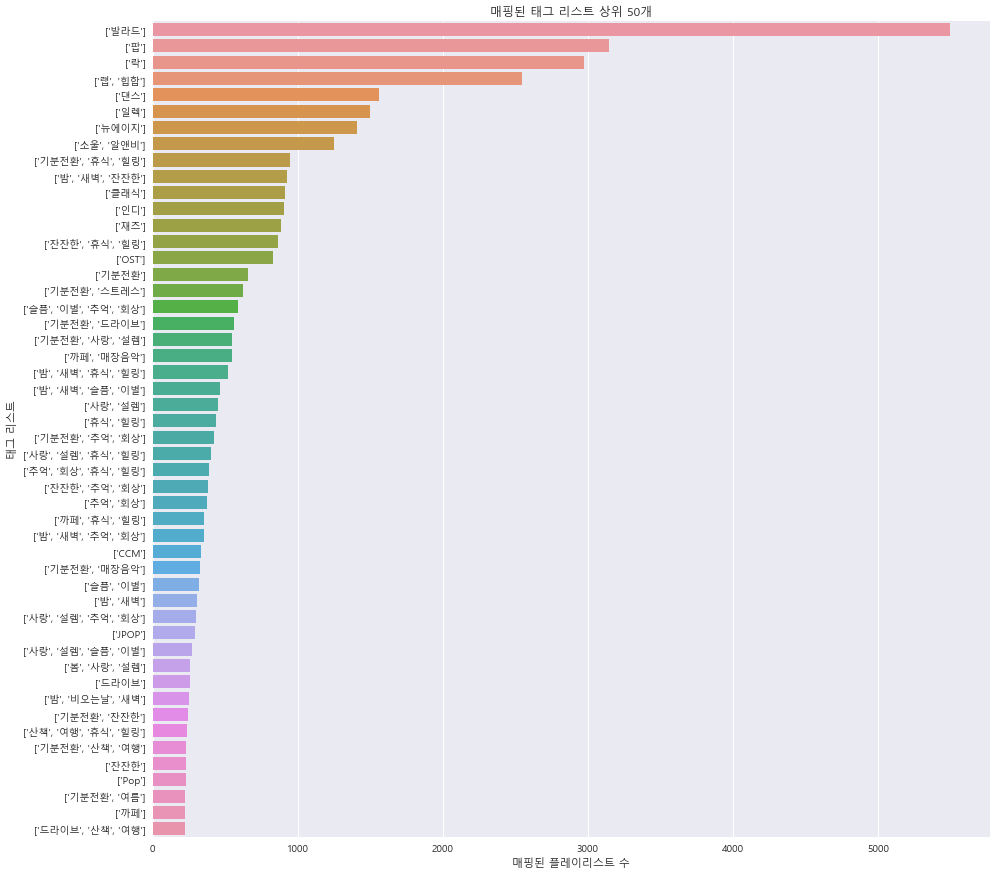

In [93]:
# 1. unnest 데이터프레임인 plylst_tag_map 테이블에서 태그 이름 정렬 후 list로 묶기
plylst_tag_list_sort = plylst_tag_map.sort_values(by = ['id', 'tags']).groupby('id').tags.apply(list).reset_index(name = 'tag_list')

# 2. 집계를 위해 1번 테이블에서 list 타입을 문자열 타입으로 변경
plylst_tag_list_sort['tag_list'] = plylst_tag_list_sort['tag_list'].astype(str)

# 3. 태그 리스트 별 매핑되는 플레이리스트 수 집계 테이블 생성 : tag_list_plylst_cnt
tag_list_plylst_cnt = plylst_tag_list_sort.groupby('tag_list').id.nunique().reset_index(name = 'plylst_cnt')

# 4. 매핑 수 기준 상위 50개 필터링
tag_list_plylst_cnt = tag_list_plylst_cnt.nlargest(50, 'plylst_cnt')

# 5. plotting
plt.figure(figsize = (15, 15))
tag_list_plylst_cnt_plot = sns.barplot(y = 'tag_list', x = 'plylst_cnt', data = tag_list_plylst_cnt)
tag_list_plylst_cnt_plot.set_title('매핑된 태그 리스트 상위 50개')
tag_list_plylst_cnt_plot.set_xlabel('매핑된 플레이리스트 수')
tag_list_plylst_cnt_plot.set_ylabel('태그 리스트')
plt.show()